# [AI-ML: Machine Learning](https://csed.acm.org/final-report/)
## CS Core: Session 1

CS Core Topics:

<ul> 
  <li style="list-style-type: none;">1. Definition and examples of a broad variety of machine learning tasks
    <ul>
      <li style="list-style-type: none;">a. Supervised learning
        <ul>
          <li style="list-style-type: none;">i. Classification</li>
          <li style="list-style-type: none;">ii. Regression</li>
        </ul>
      </li>
      <li style="list-style-type: none;">b. Reinforcement learning</li>
      <li style="list-style-type: none;">c. Unsupervised learning
        <ul>
          <li style="list-style-type: none;">i. Clustering</li>
        </ul>
      </li>
    </ul>
  </li>
  <li style="list-style-type: none;">3. A simple statistical-based supervised learning such as linear regression or decision trees
    <ul>
      <li style="list-style-type: none;">a. Focus on how they work without going into mathematical or optimization details; enough to understand and use existing implementations correctly</li>
    </ul>
  </li>
</ul>

Algorithms: 
- <u>Classification</u>: $k$-Nearest Neighbor Classification, Decision Tree Classification
- <u>Regression</u>: Linear Regression
- <u>Clustering</u>: $k$-Means Clustering
- <u>Reinforcement Learning</u>: Q-Learning
  - <u>Action selection</u>: $\epsilon$-Greedy, Sequential Halving

## Overview

[Machine Learning (ML)](https://en.wikipedia.org/wiki/Machine_learning) is a subfield of Artificial Intelligence that develops and applies algorithms that perform better at some task given more experience or data. In his book [*Machine Learning*](https://www.cs.cmu.edu/afs/cs.cmu.edu/user/mitchell/ftp/mlbook.html), Tom Mitchell wrote, "A computer program is said to **learn** from experience *E* with respect to some class of tasks *T* and performance measure *P*, if its performance at tasks in *T*, as measured by *P*, improves with experience *E*."

As we will see, this definition can apply to a variety of tasks if we consider experience to be the acquisition of more data helpful to performance in a task.  For example, having more data input-output pairs can enable a better predictor of unknown outputs from given inputs.  Having more experimental trials of a control system can inform a better control policy.  Having more data points helps us better discern clusters of similar data points.  

In this session, we will introduce three types of problems within ML: [Supervised Learning](https://en.wikipedia.org/wiki/Supervised_learning), [Reinforcement Learning](https://en.wikipedia.org/wiki/Reinforcement_learning), and [Unsupervised Learning](https://en.wikipedia.org/wiki/Unsupervised_learning).  We will define each and provide Python code examples to illustrate them.  Finally, we will present sample exercises and helpful resources for further learning.  The purpose of these materials is not to teach Python, although the code examples may be modified to complete the exercises.  Rather, the purpose of these materials is to provide a high-level overview of basic types of Machine Learning.

## Supervised Learning

[Supervised Learning](https://en.wikipedia.org/wiki/Supervised_learning) is a machine learning paradigm where models are trained using labeled datasets, i.e. input-output $(X, Y)$ pairs. In this context, each training example consists of an input object (typically a vector) and a desired output value (also known as the supervisory signal).  It is common to represent such data as a table, where each row is a training examples, and each column (attribute) is designated as an input, and output, or neither.  The goal is for the algorithm to learn a mapping from inputs to outputs that can be used to predict the outputs of unseen data accurately.

In terms of Tom Mitchell's definition, supervised learning algorithms improve their performance (*P*) at predicting the correct output labels (*T*) based on the experience (*E*) of observing many input-output pairs. This approach is foundational for tasks like classification, where the model assigns inputs to discrete categories (e.g., email spam detection), and regression, where the model predicts continuous outcomes (e.g., forecasting house prices). By leveraging labeled data, supervised learning enables the development of predictive models that generalize well to new, unseen instances.

## Formal Definition of Supervised Learning

In **[Supervised Learning](https://en.wikipedia.org/wiki/Supervised_learning)**, the objective is to learn a mapping from inputs to outputs based on example input-output pairs. Formally, given a training dataset consisting of $n$ examples:

$$
\mathcal{D} = \{(x_1, y_1),\ (x_2, y_2),\ \dots,\ (x_n, y_n)\},
$$

where:

- $x_i \in \mathcal{X}$ represents the input features from the input space $\mathcal{X}$,
- $y_i \in \mathcal{Y}$ represents the corresponding output values or labels from the output space $\mathcal{Y}$.

The goal is to find a function $f: \mathcal{X} \rightarrow \mathcal{Y}$ that best predicts the output $y$ for any given input $x$. This is achieved by minimizing a **[loss function](https://en.wikipedia.org/wiki/Loss_function)** $L(y, f(x))$, which quantifies the discrepancy between the predicted output and the true output.

The learning problem is formulated as an optimization problem:

$$
f^* = \arg\min_{f \in \mathcal{H}} \frac{1}{n} \sum_{i=1}^n L(y_i, f(x_i)),
$$

where:

- $\mathcal{H}$ is the **[hypothesis space](https://en.wikipedia.org/wiki/Hypothesis_space)**, the set of all candidate functions that the learning algorithm can consider,
- $L(y_i, f(x_i))$ is the loss incurred for the prediction $f(x_i)$ when the true output is $y_i$.

**Supervised learning algorithms** aim to find the function $f^*$ that minimizes the empirical risk (average loss over the training data). This function can then be used to make predictions on new, unseen data points $x'$ by computing $y' = f^*(x')$.

Supervised learning tasks are typically categorized into:

- **[Regression](https://en.wikipedia.org/wiki/Regression_analysis)**: When the output space $\mathcal{Y}$ is continuous (e.g., predicting temperatures, prices).
- **[Classification](https://en.wikipedia.org/wiki/Statistical_classification)**: When the output space $\mathcal{Y}$ is discrete, often a finite set of class labels (e.g., classifying emails as spam or not spam).

By leveraging labeled data, supervised learning models learn to generalize from the training data to unseen instances, aiming to minimize the prediction error on new data drawn from the same distribution.

### Supervised Learning: Classification

In **[Supervised Learning](https://en.wikipedia.org/wiki/Supervised_learning)**, **[Classification](https://en.wikipedia.org/wiki/Statistical_classification)** algorithms are given pairs of input feature vectors with their corresponding discrete output class labels.  From these pairs, classification algorithms learn a mapping from input features to discrete class labels, enabling the prediction of classes for unseen instance feature vectors.  Popular classification algorithms include [$k$-Nearest Neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm), [Decision Trees](https://en.wikipedia.org/wiki/Decision_tree_learning), [Support Vector Machines](https://en.wikipedia.org/wiki/Support_vector_machine), and [Neural Networks](https://en.wikipedia.org/wiki/Artificial_neural_network).

#### [$k$-Nearest Neighbors Classification](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

$k$-Nearest Neighbors is a particularly simple and intuitive approach to classification. For a given input vector, we look at our training data pairs, find the $k$ nearest input vectors according to some [distance metric](https://en.wikipedia.org/wiki/Metric_(mathematics)) (e.g., [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance)), and have those "nearest neighbors" vote on the class of the input. Each neighbor contributes a vote for their own class label, and the class with the most votes determines the predicted class for the input vector.

This method operates under the assumption that data points that are close to each other in the feature space are likely to belong to the same class. It's easy to implement and understand, making it a popular choice for basic classification tasks. However, the performance of $k$-Nearest Neighbors can be sensitive to the choice of $k$, the distance metric used, and the scale of the features, so careful consideration and preprocessing are important for optimal results.

#### Palmer Penguins Dataset

To illustrate classification, we will use the [**Palmer Penguins** dataset](https://allisonhorst.github.io/palmerpenguins/). This real-world dataset contains measurements for three penguin species: Adelie, Chinstrap, and Gentoo. The features include bill length (mm), bill depth (mm), flipper length (mm), body mass (g), sex, and island.  In particular, we will divide the shuffled dataset in half, using one half for $k$-Nearest Neighbors classification, and the other half to test the accuracy of our classifier.  For ease of visualization, we will use only bill length and flipper length as our inputs to predict species as our output classification.


In [2]:
# Import the necessary libraries for supervised learning and scientific visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Import the Palmer Penguins dataset and display the first few rows
penguins = sns.load_dataset('penguins')
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

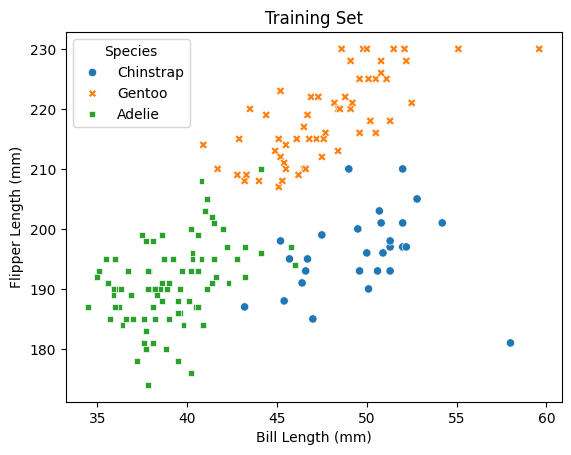

In [3]:
# Drop all columns except bill_length_mm, flipper_length_mm, and species. Drop all rows with missing values.
penguins = penguins[['bill_length_mm', 'flipper_length_mm', 'species']]
penguins = penguins.dropna()
 
# Shuffle the dataset rows with the given seed (0).
penguins = penguins.sample(frac=1, random_state=0).reset_index(drop=True)

# Split it into equal training and testing sets using random_state=0.
penguins_train, penguins_test = train_test_split(penguins, test_size=0.5, random_state=0)

# Divide the training and testing sets into input features and output labels.
X_train = penguins_train.drop(columns='species')
y_train = penguins_train['species']
X_test = penguins_test.drop(columns='species')
y_test = penguins_test['species']

# Visualize the training set using a scatter plot with different styles and hues.
sns.scatterplot(data=penguins_train, x='bill_length_mm', y='flipper_length_mm', hue='species', style='species')
plt.title('Training Set')
# Label the axes and create a legend for the species.
plt.xlabel('Bill Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.legend(title='Species', loc='upper left')
plt.show()


This visualizes the training set half of our dataset.  We have good class (color) separation, so $k$-Nearest Neighbor classification should work well.  Now we build our predictor with $k=3$:

In [4]:
# Import the K-Nearest Neighbors classifier from scikit-learn
from sklearn.neighbors import KNeighborsClassifier

# Create a K-Nearest Neighbors classifier with k=3 and fit it to the training data.
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict the species of the testing set using the trained classifier.
y_pred = knn.predict(X_test)

[Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision#In_multiclass_classification) is a metric used to evaluate the performance of a classification model. It is defined as the ratio of the number of correct predictions to the total number of predictions made. Accuracy measures how often the classifier is correct overall.  In this case, we achieve 94% accuracy in our predictions on the testing data.

In [5]:
# Calculate and print the accuracy of the classifier on the testing set.
accuracy = (y_pred == y_test).mean()
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.94


A [Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix) is a table used to describe the performance of a classification model, especially for [multi-class classification problems](https://en.wikipedia.org/wiki/Confusion_matrix#Confusion_matrices_with_more_than_two_categories), by displaying the counts of correct and incorrect predictions for each class, where each row represents an actual class and each column represents a predicted class, helping to understand the types of errors the classifier is making and to identify specific patterns of misclassification.  Below we can see that our most common misclassification was classifying "Chinstrap" as "Adelie".

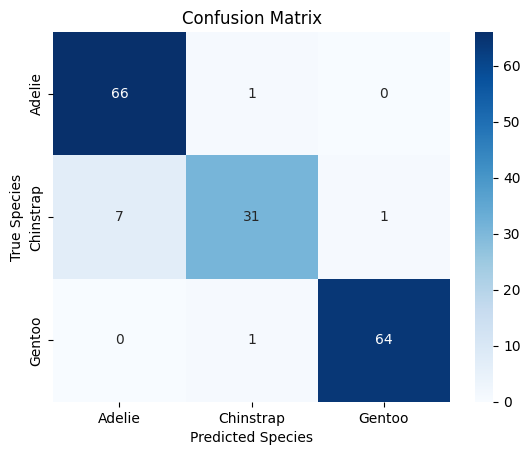

In [6]:
# Display a confusion matrix of the predictions.
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted Species')
plt.ylabel('True Species')
plt.title('Confusion Matrix')
plt.show()

Scientific Visualizations are very helpful for understanding what our models predict.  Below, we show prediction regions of $k$-Nearest Neighbor along with a scatterplot of the true classifications of our training set.  Misclassifications can be seen as point colors do not match the predicted background colors.

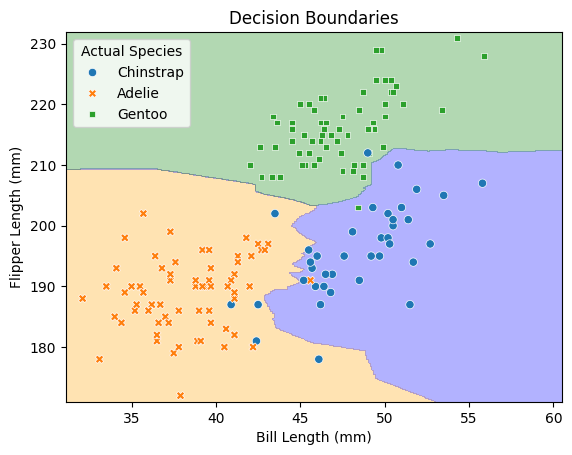

In [7]:
# Create a meshgrid of points covering the range of the training set.
x_min, x_max = penguins['bill_length_mm'].min() - 1, penguins['bill_length_mm'].max() + 1
y_min, y_max = penguins['flipper_length_mm'].min() - 1, penguins['flipper_length_mm'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict the species of the meshgrid points and convert classes to integers for contour plotting.
# Create a dataframe with the same labels as the training data predict classes for the training boundary.
df_Z = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['bill_length_mm', 'flipper_length_mm'])
Z = knn.predict(df_Z)

# Replace Adelie, Chinstrap, and Gentoo species with 0, 1, and 2, respectively in a single step using a map.
Z = np.array(list(map({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}.get, Z)))
Z = Z.reshape(xx.shape)

# Plot the decision boundaries  with Adelie, Chinstrap, and Gentoo species shown in light orange, light blue, and light green, respectively.
plt.contourf(xx, yy, Z, alpha=0.3, levels=[-0.5, 0.5, 1.5, 2.5], colors=['orange', 'blue', 'green'])

# Plot  the true species scatter plot with different styles and hues.
sns.scatterplot(data=penguins_test, x='bill_length_mm', y='flipper_length_mm', hue='species', style='species')
plt.title('Decision Boundaries')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.legend(title='Actual Species', loc='upper left')
plt.show()

#### [Decision Trees](https://en.wikipedia.org/wiki/Decision_tree_learning)

Another popular classification method is the **[Decision Tree](https://en.wikipedia.org/wiki/Decision_tree_learning)** algorithm. In the context of classification, a decision tree constructs a model in the form of a tree-like structure, where each internal node represents a test on an input feature (e.g., "Is bill length less than 45 mm?"), each branch represents the outcome of the test, and each leaf node represents a class label (e.g., the species of a penguin). The tree is built by recursively splitting the dataset based on feature values that result in the greatest separation of classes, using criteria like **[information gain](https://en.wikipedia.org/wiki/Information_gain_in_decision_trees)** or **[Gini impurity](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity)**. Decision trees are intuitive and easy to interpret, as they mimic human decision-making processes by breaking down complex decisions into a series of simpler choices, making them especially useful for understanding the classification patterns in datasets like the Palmer Penguins.

Below is a demonstration of Decision Tree learning for the same Palmer Penguin demonstration as above.  Note the differences in results.

Accuracy: 0.94


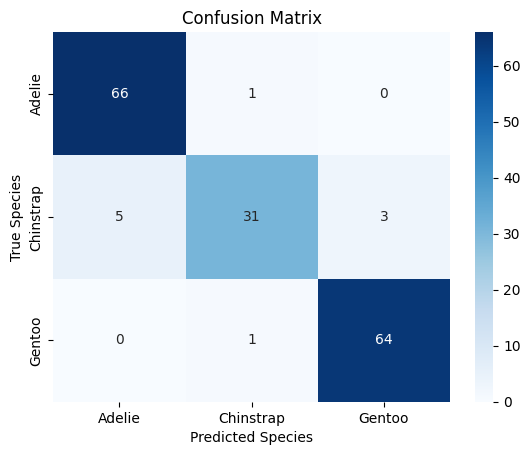

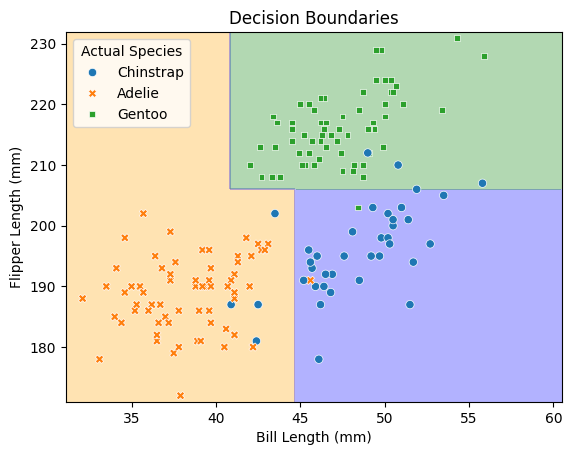

In [8]:
# Here we repeat the previous computations using a Decision Tree classifier.
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier with a maximum depth of 3 and fit it to the training data.
dt = DecisionTreeClassifier(max_depth=3, random_state=0)
dt.fit(X_train, y_train)

# Predict the species of the testing set using the trained classifier.
y_pred = dt.predict(X_test)

# Calculate and print the accuracy of the classifier on the testing set.
accuracy = (y_pred == y_test).mean()
print(f'Accuracy: {accuracy:.2f}')

# Display a confusion matrix of the predictions.
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=dt.classes_, yticklabels=dt.classes_)
plt.xlabel('Predicted Species')
plt.ylabel('True Species')
plt.title('Confusion Matrix')
plt.show()

# Predict the species of the meshgrid points and convert classes to integers for contour plotting.
Z = dt.predict(df_Z)
Z = np.array(list(map({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}.get, Z)))
Z = Z.reshape(xx.shape)

# Plot the decision boundaries with Adelie, Chinstrap, and Gentoo species shown in light orange, light blue, and light green, respectively.
plt.contourf(xx, yy, Z, alpha=0.3, levels=[-0.5, 0.5, 1.5, 2.5], colors=['orange', 'blue', 'green'])

# Plot the true species scatter plot with different styles and hues.
sns.scatterplot(data=penguins_test, x='bill_length_mm', y='flipper_length_mm', hue='species', style='species')
plt.title('Decision Boundaries')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.legend(title='Actual Species', loc='upper left')
plt.show()



Note the significant difference in the decision boundaries of the Decision Tree.  By default, our decisions split the space along boundaries of feature values.  Below is a visualization of the Decision Tree learned in this case.  First note the topmost decision condition in each node of the decision tree.  If the condition is true or false, we proceed to the left or right respectively.  Note that the Gini index is a measure of the "purity" of the training samples where "gini = 0" indicates that all samples are in the same class.  This tree is formed by recursively splitting data until either the Gini index reaches 0, or until our depth-limit is reached.  In the example below, three of the six depth 3 nodes would have split if we had allowed a depth limit of 4.  

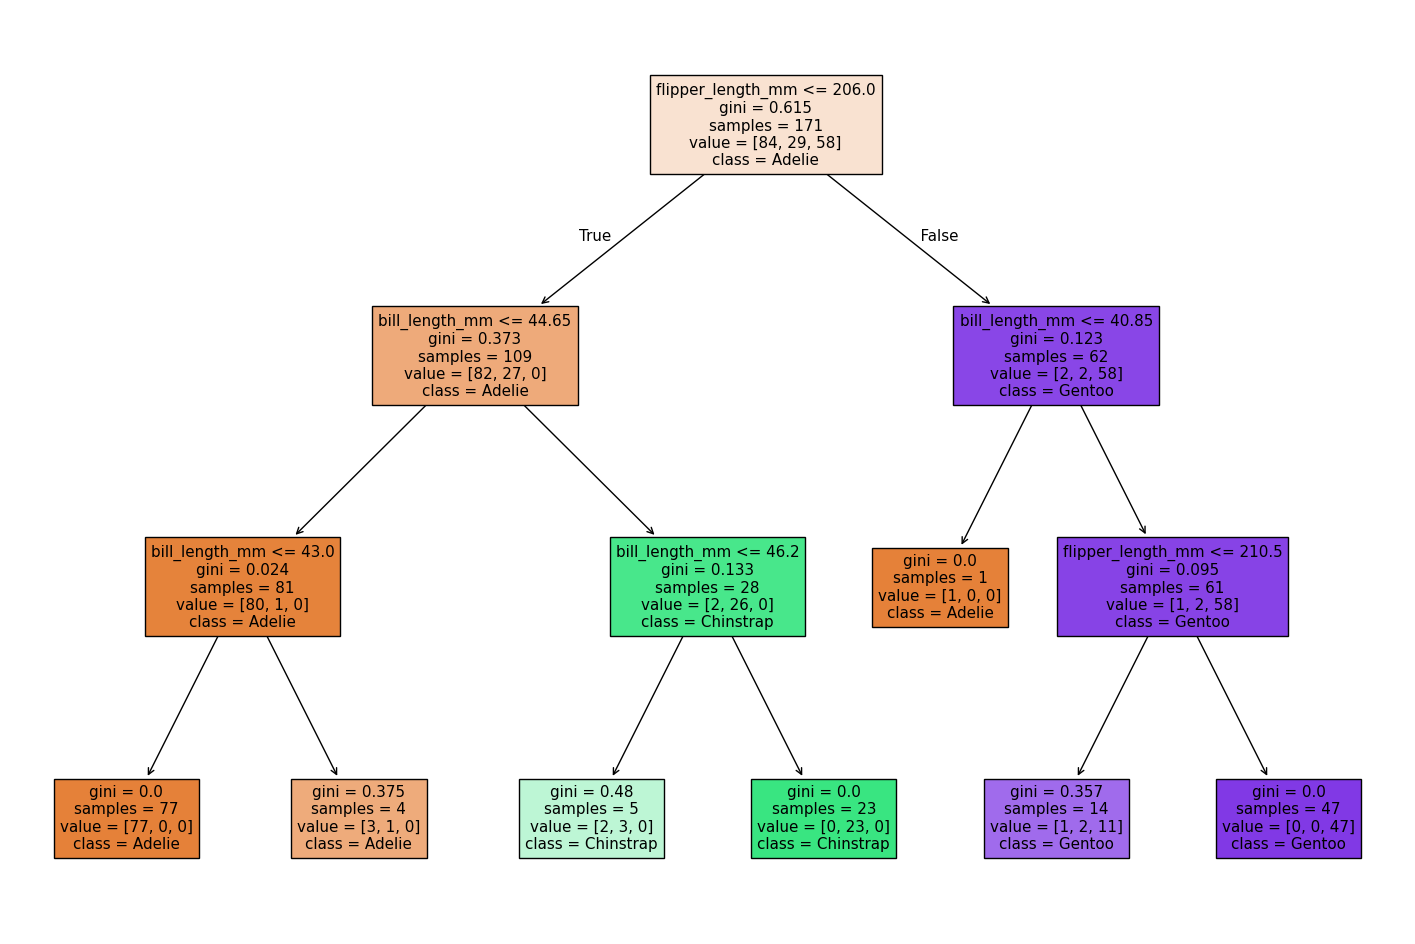

In [9]:
# Visualize the decision tree using the plot_tree function from scikit-learn.
from sklearn.tree import plot_tree

# Plot the decision tree with the feature names and class names.

plt.figure(figsize=(18, 12))
plot_tree(dt, feature_names=X_train.columns, class_names=dt.classes_, filled=True)
plt.show()

Classification is Supervised Learning prediction of discrete outputs from inputs.  When we predict continuous outputs from inputs, it is called Regression.

### Supervised Learning: Regression

[Regression](https://en.wikipedia.org/wiki/Regression_analysis) models the relationship between one or more inputs (independent variables) and a continuous output (dependent variable).  As with Classification, we train our model with a set of input-output pairs.  With [Linear Regression](https://en.wikipedia.org/wiki/Linear_regression) we seek to model a linear relationship between a dependent variable and one or more independent variables using labeled data. Using the **Auto MPG dataset** from the 1983 American Statistical Association Exposition as an example, we can predict a car's fuel efficiency—measured in miles per gallon (mpg)—based on its weight.  By training a linear regression model on this real-world dataset, we aim to find the best-fitting straight line that describes how mpg decreases as vehicle weight increases. This allows us to estimate the fuel efficiency for a car of that era given its weight, demonstrating how supervised learning can be applied to understand and predict continuous outcomes in practical scenarios.

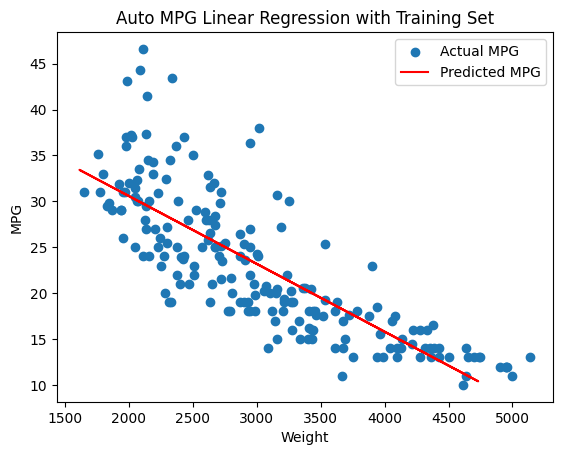

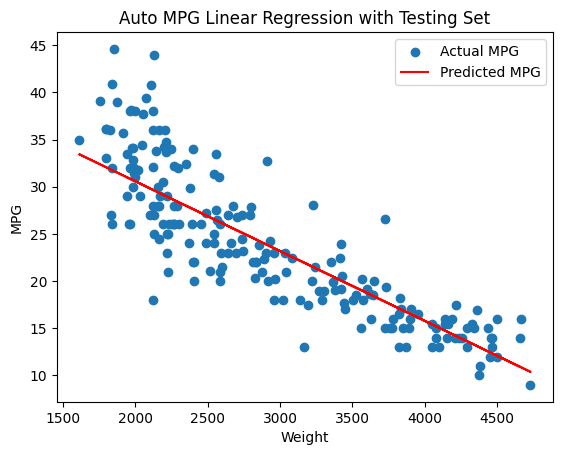

Coefficient: [-0.00738501]
Intercept: 45.33975912144672
R^2 Score: 0.74


In [10]:
# Load the Auto MPG dataset and display the first few rows.
auto = sns.load_dataset('mpg')
auto.head()

# Drop all columns except weight and mpg.
auto = auto[['weight', 'mpg']]

# Perform a linear regression on the Auto MPG dataset.
from sklearn.linear_model import LinearRegression

# Shuffle the rows with the given seed (0).
auto = auto.sample(frac=1, random_state=0).reset_index(drop=True)

# Split the Auto MPG dataset into input features and output labels.
X = auto[['weight']]
y = auto['mpg']

# Split the dataset into equal training and testing sets using random_state=0.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Create a Linear Regression model and fit it to the training data.
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict the mpg of the testing set using the trained model.
y_pred = lr.predict(X_test)

# Plot the true mpg values against the weight with a scatter plot.
plt.scatter(X_train, y_train, label='Actual MPG')
plt.title('Auto MPG Linear Regression with Training Set')
plt.xlabel('Weight')
plt.ylabel('MPG')

# Plot the predicted mpg values against the weight with a line plot.
plt.plot(X_test, y_pred, color='red', label='Predicted MPG')
plt.legend()
plt.show()

# Create the same scatter plot as before, but with the testing dataset.
plt.scatter(X_test, y_test, label='Actual MPG')
plt.title('Auto MPG Linear Regression with Testing Set')
plt.xlabel('Weight')
plt.ylabel('MPG')

# Plot the predicted mpg values against the weight with a line plot.
plt.plot(X_test, y_pred, color='red', label='Predicted MPG')
plt.legend()
plt.show()

# Display the coefficients and the intercept of the linear regression
print('Coefficient:', lr.coef_)
print('Intercept:', lr.intercept_)

# Calculate and print the R^2 score of the model on the testing set.
r2 = lr.score(X_test, y_test)
print(f'R^2 Score: {r2:.2f}')


Observe first, that the relationship between Weight and MPG is not exactly linear.  Our best-fit line predicts MPG values that are generally below true values for the lightest vehicles.  The best relationship we can estimate with a line is $\textit{MPG} = -0.00738501 * \textit{weight} + 45.33975912144672$, where $\textit{MPG}$ is miles per gallon and $weight$ is in pounds.

We also compute a metric called the **[R² score](https://en.wikipedia.org/wiki/Coefficient_of_determination)**, or coefficient of determination, that quantifies how well the independent variable(s) explain the variance of the dependent variable in a regression model.  Our linear regression obtained an **R² score of 0.74** on the testing data. An R² score of 0.74 means that **74% of the [variability](https://en.wikipedia.org/wiki/Variability) in mpg is explained by the vehicle's weight** in our model. This indicates a strong inverse linear relationship between weight and fuel efficiency, suggesting that as the weight of a car increases, its mpg tends to decrease significantly.

## Unsupervised Learning

[Unsupervised Learning](https://en.wikipedia.org/wiki/Unsupervised_learning) is a type of machine learning where models are trained using **unlabeled data**—data that does not have predefined output labels or targets. Unlike [Supervised Learning](https://en.wikipedia.org/wiki/Supervised_learning), which learns a mapping from inputs to known outputs, unsupervised learning seeks to uncover hidden patterns, structures, or features within the input data itself. The algorithms attempt to learn the inherent distribution and relationships in the data without external guidance, making unsupervised learning valuable for tasks like exploratory data analysis, dimensionality reduction, anomaly detection, and discovering groupings in data.

### Clustering as an Unsupervised Learning Problem

[Clustering](https://en.wikipedia.org/wiki/Cluster_analysis) is a fundamental unsupervised learning task that involves grouping a set of data points into clusters such that points in the same cluster are more similar to each other than to those in other clusters. The goal is to discover natural groupings in the data based on inherent characteristics or features, without any prior knowledge of class labels. Clustering algorithms, such as [k-means clustering](https://en.wikipedia.org/wiki/K-means_clustering), analyze the similarities or distances between data points—often using a [distance metric](https://en.wikipedia.org/wiki/Metric_(mathematics)) like Euclidean distance—to partition the data into meaningful clusters. This process helps in understanding the underlying structure of the data and can reveal insights that are not immediately apparent.

**Clustering** is an unsupervised learning task that aims to partition a dataset into a set of clusters based on similarity or distance measures.

Formally, given a dataset of $n$ unlabeled data points:

$$
\mathcal{D} = \{ x_1, x_2, \dots, x_n \}, \quad x_i \in \mathcal{X}
$$

where $\mathcal{X}$ is the input space, the goal is to partition $\mathcal{D}$ into $K$ clusters $\{ C_1, C_2, \dots, C_K \}$ such that:

1. **Exclusivity**: Each data point belongs to exactly one cluster $C_i$, i.e. the clusters partition the points:

$$
C_i \subseteq \mathcal{D}, \quad C_i \cap C_j = \emptyset \text{ for } i \neq j, \quad \bigcup_{i=1}^{K} C_i = \mathcal{D}
$$

2. **Intra-cluster similarity**: Data points within the same cluster are more similar to each other.

3. **Inter-cluster dissimilarity**: Data points from different clusters are less similar to each other.

Clustering algorithms aim to find the partitioning $\{ C_1, C_2, \dots, C_K \}$ that optimizes a specific objective function based on a similarity or [distance metric](https://en.wikipedia.org/wiki/Metric_(mathematics)) $d: \mathcal{X} \times \mathcal{X} \rightarrow \mathbb{R}$.

For example, in [$k$-Means Clustering](https://en.wikipedia.org/wiki/K-means_clustering), the objective is to minimize the sum of squared distances between each data point and the centroid of its assigned cluster:

$$
\text{Objective: } \min_{C_1, \dots, C_K} \sum_{i=1}^{K} \sum_{x_j \in C_i} \| x_j - \mu_i \|^2
$$

where:

- $\mu_i$ is the centroid (mean) of cluster $C_i$:

$$
\mu_i = \frac{1}{|C_i|} \sum_{x_j \in C_i} x_j
$$

The clustering problem seeks to find the optimal clusters that minimize the intra-cluster distances while maximizing the inter-cluster distances. Since clustering is unsupervised, there is no ground truth to evaluate the performance definitively; instead, metrics like [silhouette score](https://en.wikipedia.org/wiki/Silhouette_(clustering)) and within-cluster sum of squares (WCSS, the Objective above for $k$-Means Clustering) are used to assess the quality of the clustering.

Clustering is widely used in data mining, pattern recognition, image analysis, and bioinformatics to discover meaningful patterns and structures in data without predefined labels.  Here, we will illustrate the use of $k$-Means Clustering on the Palmer Penguins dataset.  Imagine that we didn't know the species apriori and wanted to see if we could predict species from clusters of similar attributes.

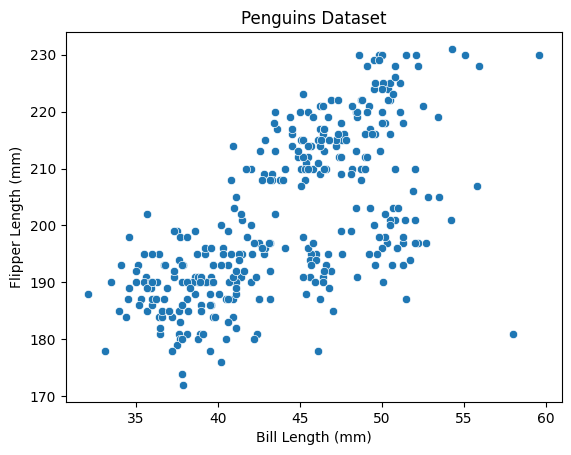

In [11]:
# Scatter plot the bill_length_mm and flipper_length_mm columns from the entire penguins dataset.
sns.scatterplot(data=penguins, x='bill_length_mm', y='flipper_length_mm')
plt.title('Penguins Dataset')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.show()

Looking at the unlabeled data, we see that there could be three clusters, or possibly two big clusters and two little clusters.  We cluster these into three clusters using $k$-Means Clustering, an algorithm that starts by initializing three *centroids*, center points for our clusters.  A point is assigned to the cluster of its nearest centroid.  Then we repeat the following process until no further changes to cluster assignments occur:
- Adjust a centroid to be the average of the points assigned to its cluster.
- Reassign points to the cluster of its nearest centroid.

The first step changes centroid ($\mu_i$ above) to minimize the Objective WCSS.  The second step changes the cluster assignments to minimize the Objective WCSS.  This iterative greedy optimization can get stuck in clusters that are local minima.  Running $k$-Means Clustering and choosing the clustering with the minimum WCSS can help.  We will now see how $k$-Means Clustering performs with this data with $k=3$ and a random seed of 0. 

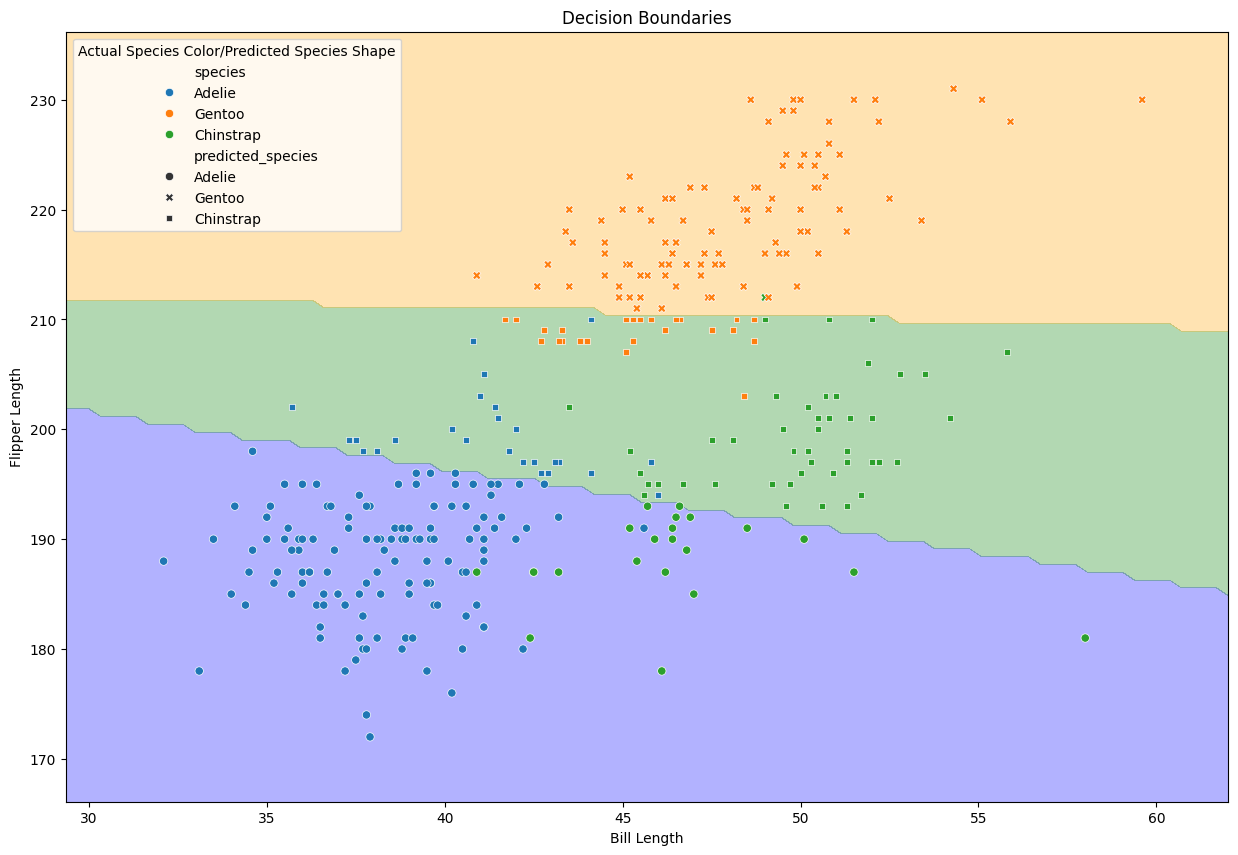

Accuracy: 0.79


In [12]:
# Use k-Means Clustering to group the penguins into 3 clusters based on bill_length_mm and flipper_length_mm.
from sklearn.cluster import KMeans

# We will call our training set X. Species information will later be compared against the clusters.
penguins_train = penguins[['bill_length_mm', 'flipper_length_mm']]
species = penguins['species']

def k_means(penguins_train, species):

    # Create a K-Means clustering model with 3 clusters and fit it to the penguins dataset.
    kmeans = KMeans(n_clusters=3, random_state=0)
    kmeans.fit(penguins_train)

    # Assign the clusters of the testing set using the trained model.
    penguins_train['clusters'] = kmeans.predict(penguins_train)

    # Add back the species column to the training set for comparison.
    penguins_train['species'] = species

    # Find the most common species in each cluster and assign it as the cluster's species.
    cluster_species = penguins_train.groupby('clusters')['species'].agg(lambda x: x.value_counts().index[0])
    penguins_train['predicted_species'] = penguins_train['clusters'].map(cluster_species)

    # Create a meshgrid of points covering the range of the training set.
    x_range = penguins_train['bill_length_mm'].max() - penguins_train['bill_length_mm'].min()
    y_range = penguins_train['flipper_length_mm'].max() - penguins_train['flipper_length_mm'].min()
    x_min, x_max = penguins_train['bill_length_mm'].min() - .1 * x_range, penguins_train['bill_length_mm'].max() + .1 * x_range
    y_min, y_max = penguins_train['flipper_length_mm'].min() - .1 * y_range, penguins_train['flipper_length_mm'].max() + .1 * y_range
    xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max - x_min) * .01), np.arange(y_min, y_max, (y_max - y_min) * .01))

    # Predict the species of the meshgrid points and convert classes to integers for contour plotting.
    # Create a dataframe with the same labels as the training data predict classes for the training boundary.
    df_Z = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['bill_length_mm', 'flipper_length_mm'])
    Z = kmeans.predict(df_Z)

    # Replace Adelie, Chinstrap, and Gentoo species with 0, 1, and 2, respectively.
    Z = np.array(list(map(cluster_species.get, Z)))  # From cluster numbers to species names
    Z = np.array(list(map({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}.get, Z))) # From species names to integers
    Z = Z.reshape(xx.shape)

    # Create a large plot to display the decision boundaries and the true species scatter plot.

    plt.figure(figsize=(15, 10))

    # Plot the decision boundaries  with Adelie, Chinstrap, and Gentoo species shown in light orange, light blue, and light green, respectively.
    plt.contourf(xx, yy, Z, alpha=0.3, levels=[-0.5, 0.5, 1.5, 2.5], colors=['blue', 'green', 'orange'])

    # Plot  the true species scatter plot with different styles and hues.
    sns.scatterplot(data=penguins_train, x='bill_length_mm', y='flipper_length_mm', hue='species', style='predicted_species')
    plt.title('Decision Boundaries')
    plt.xlabel('Bill Length')
    plt.ylabel('Flipper Length')
    plt.legend(title='Actual Species Color/Predicted Species Shape', loc='upper left')
    plt.show()

    # Print the accuracy of matching the predicted species to the actual species.
    accuracy = (penguins_train['species'] == penguins_train['predicted_species']).mean()
    print(f'Accuracy: {accuracy:.2f}')

k_means(penguins_train, species)

Our clusters only predict different true species (not given for cluster) with 84% accuracy.  Note the odd horizontal band bias seen in our prediction regions.  Next, note the difference in the maximum and minimum values in our features:

In [13]:
# Print the range of values for each feature in the penguins dataset.
for feature in ['bill_length_mm', 'flipper_length_mm']:
    print(f'{feature}: {penguins[feature].max()} - {penguins[feature].min()} = {penguins[feature].max() - penguins[feature].min()}')    

bill_length_mm: 59.6 - 32.1 = 27.5
flipper_length_mm: 231.0 - 172.0 = 59.0


The flipper length has a over double the range, and exerts effectively as much influence on our Euclidean distance metric.  For this reason, we will often *scale* or *normalize* data so that no feature is given undue influence due to the magnitude and range of its values.  Observe the improvement when we scale this data linearly according to the minimum and maximum values of its input features:

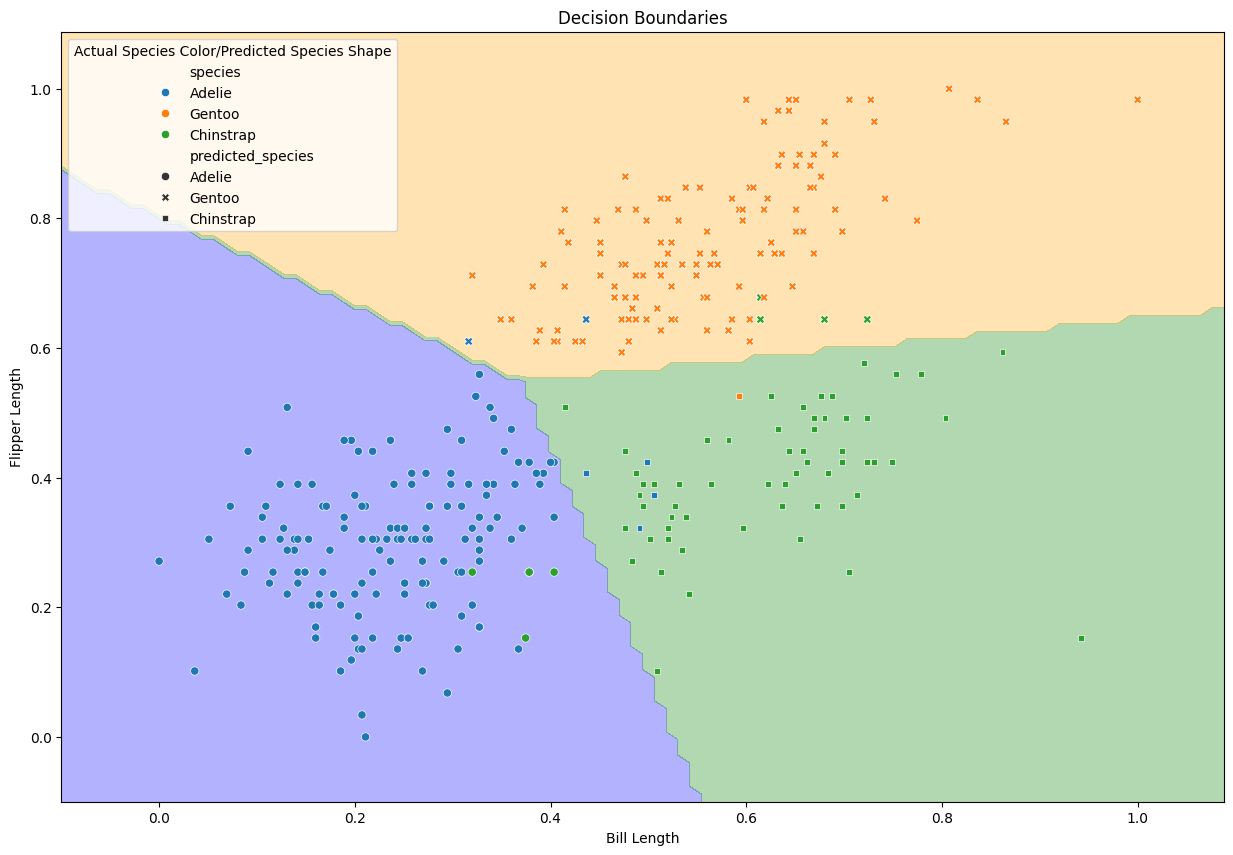

Accuracy: 0.95


In [14]:
# Normalize the penguins dataset using the Min-Max scaling method.
from sklearn.preprocessing import MinMaxScaler
penguins_train = penguins[['bill_length_mm', 'flipper_length_mm']]
scaler = MinMaxScaler()
scaler.fit(penguins_train)
penguins_train_scaled = scaler.transform(penguins_train)
# Replace the original columns with the scaled values.
penguins_train = pd.DataFrame(penguins_train_scaled, columns=penguins_train.columns)
k_means(penguins_train, species)

Thus, we can see that sometimes clustering *without class information* can sometimes suggest legitimate classes with some accuracy.  There are many other [clustering techniques](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html).  Also, there are other supervised learning tasks as well.  Letting the data effectively speak for itself through Unsupervised Learning techniques can be an important first step in intelligently handling data.

## Reinforcement Learning

[Reinforcement Learning](https://en.wikipedia.org/wiki/Reinforcement_learning) is a branch of machine learning where an agent learns to sequentially act in different states of an environment so as to maximize expectation of future rewards.  For each choice of action in a state, the environment provides immediate reward feedback and transitions the agent to a next state.  With more experience, a reinforcement learning gains a better estimation of which actions maximize the expected sum of future rewards.  This approach is widely applied in areas such as robotics, game playing, and autonomous systems, where agents must adaptively learn strategies to navigate complex and dynamic environments.

<img src="rlai-fig-3-1.png" alt="Reinforcment Learning: An Introduction, 2nd ed, Fig. 3.1" title="Reinforcment Learning: An Introduction, 2nd ed, Fig. 3.1" width="35%"/><br>

(Source: [*Reinforcement Learning: An Introduction, 2nd ed.*](http://incompleteideas.net/book/the-book.html), Figure 3.1)

### Formal Definitions

Formally, **Reinforcement Learning (RL)**, RL is often modeled using a **[Markov Decision Process (MDP)](https://en.wikipedia.org/wiki/Markov_decision_process)**, which is defined by the tuple $(\mathcal{S}, \mathcal{A}, P, R, \gamma)$:

- **$\mathcal{S}$ (States)**: A finite set of states representing all possible situations in which the agent can find itself.
- **$\mathcal{A}$ (Actions)**: A finite set of actions available to the agent.
- **$P: \mathcal{S} \times \mathcal{A} \times \mathcal{S} \rightarrow [0,1]$ (Transition Probability)**: The probability $P(s'|s,a)$ of transitioning to state $s'$ given that the agent takes action $a$ in state $s$.
- **$R: \mathcal{S} \times \mathcal{A} \rightarrow \mathbb{R}$ (Reward Function)**: The immediate reward $R(s,a)$ received after taking action $a$ in state $s$.
- **$\gamma \in [0,1)$ (Discount Factor)**: A factor that determines the importance of future rewards versus immediate rewards.

The central objective in reinforcement learning is to find an **optimal policy** $\pi^*: \mathcal{S} \rightarrow \mathcal{A}$ that maximizes the expected **cumulative discounted reward**:

$$
\pi^* = \arg\max_{\pi} \mathbb{E}\left[ \sum_{t=0}^{\infty} \gamma^t R(s_t, a_t) \mid \pi \right]
$$

where $s_t$ and $a_t$ are the state and action at time step $t$, respectively, and the expectation is taken over the stochastic transitions defined by $P$.

In this setting:

- **Policy ($\pi$)**: A strategy that specifies the action to take in each state.
- **Value Function ($V^\pi(s)$)**: The expected cumulative discounted reward when starting from state $s$ and following policy $\pi$.
- **Action-Value Function ($Q^\pi(s,a)$)**: The expected cumulative discounted reward when starting from state $s$, taking action $a$, and thereafter following policy $\pi$.

Reinforcement learning algorithms aim to estimate these value functions and derive the optimal policy $\pi^*$ that yields the highest possible cumulative reward. Techniques such as **[Q-learning](https://en.wikipedia.org/wiki/Q-learning)** and **[Policy Gradients](https://en.wikipedia.org/wiki/Policy_gradient_methods)** are commonly used to solve RL problems by iteratively improving the policy based on feedback from the environment.






### The Exploration-Exploitation Dilemma and the Multi-Armed Bandit

A fundamental challenge in RL is the [*Exploration-Exploitation Dilemma*](https://en.wikipedia.org/wiki/Exploration-exploitation_dilemma).  Imagine sitting down to dinner in a restaurant that you have experienced few times.  You might feel a tension between ordering your favorite entrée or choosing an entrée that you haven't had before.  Perhaps a new entrée might become your new favorite.  Perhaps you will experience regret for not having chosen something you knew you would have enjoyed more.  This tension between acting so as to make a "greedy" choice of what you currently believe to be best, *exploiting* prior knowledge, versus *exploring* different actions and possibly gaining knowledge is the known as the Exploration-Exploitation Dilemma.

A *one-armed bandit* is a slang term for a slot machine, a gambling machine where one pays money to gain an unknown (often 0) monetary reward.  The [*multi-armed bandit (MAB) problem*](https://en.wikipedia.org/wiki/Multi-armed_bandit) is commonly used to experiment with different action selection algorithms that balance exploration with exploitation, often to minimize regrets of not choosing better actions in retrospect.

Here, we will illustrate a couple action selection methods with a 5-armed bandit problem, where each arm gives rewards according to a Gaussian (Normal) distribution with a standard deviation of 1 around a mean that is chosen from a Gaussian distribution with mean 0 and standard deviation 1:

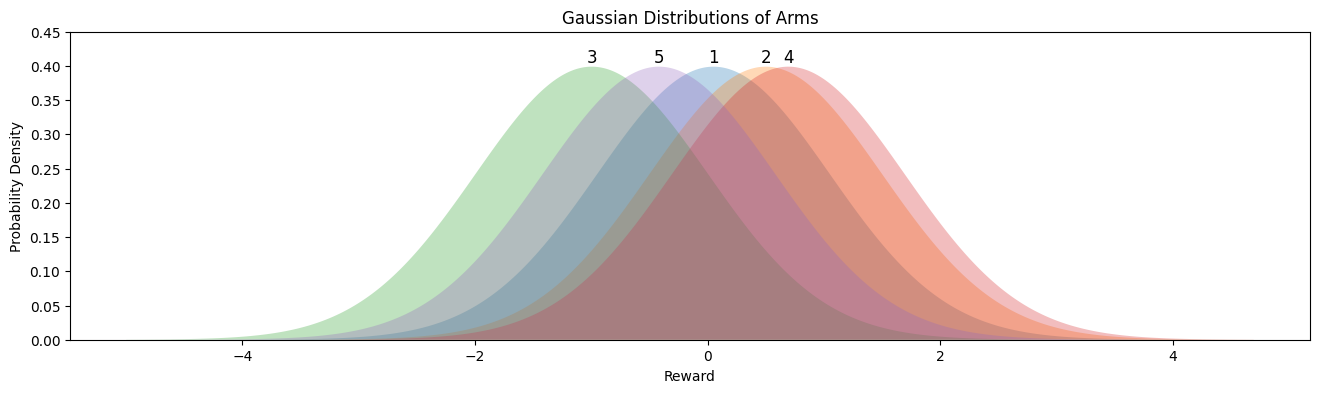

Arm Means: Arm 1: 0.05, Arm 2: 0.50, Arm 3: -1.00, Arm 4: 0.69, Arm 5: -0.42, 


In [100]:
std_dev = 1
arm_mean_mean = 0
num_arms = 5
arm_numbers = np.arange(1, num_arms + 1)
np.random.seed(4)
arm_means = np.random.normal(arm_mean_mean, std_dev, num_arms)
# In case the algorithm changes, these are the means generated:
arm_means = np.array([0.05056171, 0.49995133, -0.99590893, 0.69359851, -0.41830152])
arm_std_dev = 1

# Visualize the Gaussian distributions of the arms.
plt.figure(figsize=(16, 4))
x = np.linspace(arm_means.min() - 4 * arm_std_dev, arm_means.max() + 4 * arm_std_dev, 1000)
# Fill the distributions with differing semi-transparent colors.
# Label each arm distribution '1' through '5' at the corresponding mean.
plt.ylim(0, .45)
for i in range(num_arms):
    y = np.exp(-0.5 * ((x - arm_means[i]) / arm_std_dev) ** 2) / (arm_std_dev * np.sqrt(2 * np.pi))
    plt.fill_between(x, y, alpha=0.3)
    plt.text(arm_means[i], y.max(), str(arm_numbers[i]), fontsize=12, ha='center', va='bottom')
plt.title('Gaussian Distributions of Arms')
plt.xlabel('Reward')
plt.ylabel('Probability Density')
plt.show()

print('Arm Means:', end=' ')
for i, mean in enumerate(arm_means):
    print(f'Arm {arm_numbers[i]}: {mean:.2f}', end=', ')
print()

For this 5-arm bandit problem, there is significant uncertainty.  Reward distributions overlap, so single samples are unlikely to provide useful information for determining the best arm to pull.

One simple strategy for action selection is *$\epsilon$-greedy* selection.  With probability $\epsilon$, choose a random action.  Otherwise, choose a "greedy" action that has yielded the best average rewards, breaking ties at random.  Below is an implementation of this approach to the bandit problem from Section 2.5 of [*Reinforcement Learning: An Introduction, 2nd ed.*](http://incompleteideas.net/book/the-book.html) by Richard S. Sutton and Andrew G. Barto.  We limit it here to 1000 iterations with $\epsilon = 0.1$.

In [105]:
num_actions = num_arms
Q = np.zeros(num_actions)
N = np.zeros(num_actions)
num_iterations = 1000
epsilon = 0.1
seed = 0
np.random.seed(seed)

def reward(action):
    return np.random.normal(arm_means[action], arm_std_dev)

for _ in range(num_iterations):
    if np.random.rand() < epsilon: # With probability epsilon, choose from all actions
        possible_a = np.arange(num_actions)
    else: # Otherwise, choose from all action(s) with the highest estimated value
        possible_a = np.where(Q == Q.max())[0]
    a = np.random.choice(possible_a)  # action
    r = reward(a)  # reward
    N[a] += 1  # increment action selection count
    Q[a] += (r - Q[a]) / N[a]  # update action-value average

# For each "Arm", print the "Q" estimated action value, the "Mean" of the arm, and the "# Selections" of the arm as a table.
print('Arm,\t    Q,\t Mean,\tSelections')
for i in range(num_actions):
    print(f'{(arm_numbers[i]):3},\t{Q[i]:5.2f},\t{arm_means[i]:5.2f},\t{int(N[i]):{len(str(num_iterations))}}')

# Print the best arm according to the estimated action values.
best_arm = np.where(Q == Q.max())[0][0]
print(f'Best Arm: {arm_numbers[best_arm]}')

Arm,	    Q,	 Mean,	Selections
  1,	 0.15,	 0.05,	  94
  2,	 0.47,	 0.50,	  99
  3,	-0.82,	-1.00,	  20
  4,	 0.66,	 0.69,	 768
  5,	-0.09,	-0.42,	  19
Best Arm: 4


In the table above, for each arm, we see the estimated action value Q, the true Mean for the arm, and the number of times the arm was selected across the iterations. Despite the significant overlap in reward distributions we see that for seed 0, the true best arm 4 was selected the most often.  The 2nd and 3rd best arms were samplied a significant fraction of times, and the worst two arms were sampled at the lowest rate expected for our given $\epsilon$.

If you rerun the experiment with different seeds, you will see that arm 2 is sometimes concluded to be the best arm when we are limited to 1000 iterations.

There are many algorithms for action selection.  Here is a recent one called the [Sequential Halving Algorithm](https://dl.acm.org/doi/10.5555/3042817.3043075) that assumes a limited budget of iterations for action selection.  We perform our arm pulls in rounds.  After each round, we eliminate the worst performing half of arms.  Thus, the number of rounds needed is logarithmic (base 2) in the number of arms.  Within each round, we evenly apprortion selections among remaining arms.

In [108]:
np.random.seed(seed)

remaining_a = np.arange(num_arms) + 1  # initially all arms
num_rounds = int(np.ceil(np.log2(num_arms)))  # number of rounds to find the best single arm
for r in range(num_rounds):
    # evenly apportion the remaining iterations to the remaining arms
    times = int(np.floor(num_iterations / (len(remaining_a) * num_rounds)))
    rewards = np.zeros(len(remaining_a))
    for i, a in enumerate(remaining_a):
        for _ in range(times):
            rewards[i] += reward(i)
    print(f'Round {r + 1} total rewards:', end=' ')
    for i, a in enumerate(remaining_a):
        print(f'Arm {a + 1}: {rewards[i] / times:.2f}', end='\t ')
    # keep the best half of the arms
    next_num_arms = int(np.ceil(len(remaining_a) / 2))
    remaining_a = remaining_a[np.argsort(rewards)][-next_num_arms:]
    print(f'\nKeeping best {next_num_arms} arm(s) {remaining_a}...')
print('Best Arm:', remaining_a[0])

Round 1 total rewards: Arm 2: 0.06	 Arm 3: 0.76	 Arm 4: -1.11	 Arm 5: 0.59	 Arm 6: -0.43	 
Keeping best 3 arm(s) [1 4 2]...
Round 2 total rewards: Arm 2: -0.08	 Arm 5: 0.41	 Arm 3: -1.19	 
Keeping best 2 arm(s) [1 4]...
Round 3 total rewards: Arm 2: -0.01	 Arm 5: 0.55	 
Keeping best 1 arm(s) [4]...
Best Arm: 4


While still not guaranteed to determine the best arm after 1000 iterations, sequential halving is more reliable than $\epsilon$-greedy with $\epsilon = 0.1$.  These two algorithms are relevant for action selection in a given single state.  We will next consider how an agent may learn to perform an optimal *sequence* of actions through multiple states and consider the general RL problem. 

### Bellman Optimality Equation for $Q^*(s,a)$

The **[Bellman Optimality Equation](https://en.wikipedia.org/wiki/Bellman_equation)** provides a fundamental recursive relationship in **[Reinforcement Learning](https://en.wikipedia.org/wiki/Reinforcement_learning)** for determining the optimal action-value function, denoted as $Q^*(s,a)$. This equation defines $Q^*(s,a)$ as the maximum expected cumulative reward achievable by taking action $a$ in state $s$ and thereafter following the optimal policy. Formally, the $Q^*(s,a)$ form of the Bellman optimality equation is expressed as:

$$
Q^*(s, a) = \sum_{s', r} P(s', r \mid s, a) \left[ r + \gamma \max_{a'} Q^*(s', a') \right]
$$

where:

- $s$ is the current **[state](https://en.wikipedia.org/wiki/Markov_decision_process#Terminology)**,
- $a$ is the **[action](https://en.wikipedia.org/wiki/Action_(reinforcement_learning))** taken in state $s$,
- $P(s', r \mid s, a)$ is the probability of transitioning to state $s'$ and receiving reward $r$ after taking action $a$ in state $s$,
- $\gamma$ is the **[discount factor](https://en.wikipedia.org/wiki/Discount_factor)** determining the importance of future rewards,
- $s'$ is the next state resulting from taking action $a$ in state $s$,
- $a'$ represents possible actions in the next state $s'$.

This equation encapsulates the principle that the optimal action-value for a given state-action pair is the expected immediate reward plus the discounted maximum expected action-value of the next state. By iteratively applying the Bellman optimality equation, reinforcement learning algorithms can converge to the optimal policy that maximizes the expected cumulative reward over time.

### Q-Learning

The Reinforcment Learning algorithm *Q-Learning* derives from this optimality equation.

<img src="rlai-q-learning.png" alt="Reinforcment Learning: An Introduction, 2nd ed, Section 6.5" title="Reinforcment Learning: An Introduction, 2nd ed, Section 6.5" width="50%"/><br>

(Source: [*Reinforcement Learning: An Introduction, 2nd ed.*](http://incompleteideas.net/book/the-book.html), Section 6.5)

The basic idea is this: Initially, we have arbitrary estimates for $Q(s,a)$ values.  Through successive episodes, i.e. experiences of the environment from initial states to terminal states, we update our estimates according to the optimality equation in an amount proportional to learning rate $\alpha$.  The $Q(s,a)$ update step may be rewritten as:

$$ Q(S,A) \leftarrow (1 - \alpha) Q(S,A) + \alpha [R + \gamma \max_a Q(S',a)]$$

In this form, one can more clearly see that $\alpha \in [0, 1]$ is the proportion with which we replace our old estimate of $Q(S,A)$ with the value suggested by our most recent transition.  In application, we may reduce $\alpha$ over successive episodes so as to reduce the variance created by very different state transitions and rewards.

### Grid Bandits

In the following example, which we will call "Grid Bandits", we define a grid world where an agent is trying to get from a start row and column $(r_\mathrm{start}, c_\mathrm{start})$ to a goal row and column $(r_\mathrm{goal}, c_\mathrm{goal})$.  Each grid cell contains a Gaussian bandit arm from above, with means drawn uniformly from $[-4.5, 0.5)$.  Each time the agent moves from a cell $s$ to an orthogonally (horizontally or vertically) adjacent cell $s'$, the agent is rewarded the bandit pull of $s'$ minus 1, the cost of the movement.  Further, let any attempt of the agent to move in a direction beyond the grid simply move to the same cell.  Since the bandit means are below the movement costs, the bandit should learn to move to the goal in as few steps as possible, yet choosing those steps as to pull the most advantageous sequence of cell bandit arms.

Letting our grid size be $5 \times 5$, our start in the upper-left and our goal in the lower-right, we can use simple dynamic programming to compute the true $max_a Q(S, a)$ values for the grid:


In [18]:
seed = 0
np.random.seed(seed)
size = 5
num_states = size * size
directions = ['up', 'down', 'left', 'right']
UP, DOWN, LEFT, RIGHT = 0, 1, 2, 3
row_col_changes = [(-1, 0), (1, 0), (0, -1), (0, 1)]

def row_col_to_state(row, col):
    return row * size + col

def state_to_row_col(state):
    return divmod(state, size)

def state_transition(state, action):
    row, col = state_to_row_col(state)
    row_change, col_change = row_col_changes[action]
    new_row, new_col = row + row_change, col + col_change
    # bracket the new row and column to the grid
    new_row = max(0, min(size - 1, new_row))
    new_col = max(0, min(size - 1, new_col))
    return row_col_to_state(new_row, new_col)

# Initialize the means of the arm bandits to be drawn uniformly from the interval [-0.5, 0.5) with standard deviation 1.
arm_means = np.linspace(-0.5, 0.5, num=num_states)
np.random.shuffle(arm_means)
arm_std_dev = 1

# Display the grid world with the means of the arm bandits at each location.
print('Arm Means:')
for row in range(size):
    for col in range(size):
        print(f'{arm_means[row_col_to_state(row, col)]:5.2f}', end='\t')
    print()

# Compute the true max_a Q(S, a) value and maximizing a for each state, 
#   given that we know an optimal path always proceeds down and to the right.
V = np.zeros(size * size)
policy = np.zeros(size * size, dtype=int)
# From the last state to the first state:
for state in range(num_states - 2, -1, -1):
    V[state] = -np.inf
    # For each DOWN/RIGHT action that doesn't lead to the same state, 
    #   calculate the value of the next state and update the maximum value and maximizing action.
    for action in [DOWN, RIGHT]:
        if state_transition(state, action) == state:
            continue
        next_state = state_transition(state, action)
        Q_state_action = -1 + arm_means[next_state] + V[next_state]
        if Q_state_action > V[state]:
            V[state] = Q_state_action
            policy[state] = action

# Display the true max_a Q(S, a) value for each state in a grid.
print('True max_a Q(S, a), i.e. V(s):')
for row in range(size):
    for col in range(size):
        print(f'{V[row_col_to_state(row, col)]:5.2f}', end='\t')
    print()

# Display the maximizing action for each state in a grid.
print('Maximizing Action (optimal policy):')
for row in range(size):
    for col in range(size):
        state = row_col_to_state(row, col)
        print(directions[policy[state]] if state != num_states - 1 else 'goal', end='\t')
    print()

Arm Means:
-0.29	-0.42	 0.29	 0.17	-0.04	
 0.42	 0.21	 0.50	 0.46	 0.08	
-0.46	-0.08	 0.04	-0.17	-0.25	
 0.25	-0.33	-0.12	-0.21	 0.33	
-0.38	-0.50	 0.38	 0.12	 0.00	
True max_a Q(S, a), i.e. V(s):
-6.25	-5.58	-4.88	-4.38	-3.83	
-5.67	-4.88	-4.38	-3.83	-2.92	
-5.67	-4.58	-3.62	-2.88	-1.67	
-4.96	-3.62	-2.50	-1.67	-1.00	
-4.00	-2.50	-1.88	-1.00	 0.00	
Maximizing Action (optimal policy):
down	right	down	down	down	
right	right	right	right	down	
right	right	down	down	down	
right	right	down	right	down	
right	right	right	right	goal	


Now, we implement Q-learning for the Grid Bandit problem, allowing the agent to wander in _any_ direction from any state, and see what is learned through experience.  Here we use a step size of $\alpha = 0.01$, $\epsilon = 0.1$, and $\gamma = 1$ (no discounting) for 10,000 episodes. 

In [19]:
alpha = 0.01  # a.k.a. step size, learning rate
epsilon = 0.1  # probability of choosing a random action
num_episodes = 10000  # number of episodes to run
gamma = 1  # discount factor (1 = no discount)
seed = 0
np.random.seed(seed)

def environment(state, action):
    next_state = state_transition(state, action)
    reward = -1 + np.random.normal(arm_means[next_state], arm_std_dev)
    is_terminal = next_state == num_states - 1
    return next_state, reward, is_terminal


# Initialize the Q table to zeros and the N table to zeros.
Q = np.zeros((num_states, len(directions)))
for _ in range(num_episodes):
    state = 0
    is_terminal = False
    while not is_terminal:
        if np.random.rand() < epsilon:  # With probability epsilon, choose a random action
            action = np.random.choice(len(directions))
        else:  # Otherwise, choose the action with the highest Q value
            action = np.argmax(Q[state])
        next_state, reward, is_terminal = environment(state, action)  # Environment feedback
        Q[state, action] += alpha * (reward + gamma * Q[next_state].max() - Q[state, action])  # *** Key Q(s, a) update ***
        state = next_state

# Display the estimated max_a Q(S, a) table for each state in a grid.
print('Estimated max_a Q(S, a):')
for row in range(size):
    for col in range(size):
        state = row_col_to_state(row, col)
        print(f'{Q[state].max():5.2f}', end='\t')
    print()

# Display the estimated maximizing action for each state in a grid.
print('Estimated Maximizing Action (* = optimal):')
for row in range(size):
    for col in range(size):
        state = row_col_to_state(row, col)
        Q_policy = Q[state].argmax()
        print('*' if Q_policy == policy[state] else '', 
              directions[Q_policy] if state != num_states - 1 else 'goal', sep='', end='\t')
    print()

# Display the differences between the true and estimated max_a Q(S, a) values for each state in a grid.
print('max_a Q(S, a) error:')
for row in range(size):
    for col in range(size):
        state = row_col_to_state(row, col)
        print(f'{Q[state].max() - V[state]:5.2f}', end='\t')
    print()

Estimated max_a Q(S, a):
-6.07	-5.47	-4.81	-4.36	-3.77	
-5.58	-4.93	-4.41	-3.87	-2.86	
-4.93	-4.50	-3.73	-2.77	-1.63	
-4.49	-3.55	-2.49	-1.53	-0.92	
-3.55	-2.41	-1.96	-0.99	 0.00	
Estimated Maximizing Action (* = optimal):
*down	*right	*down	right	*down	
*right	*right	*right	*right	*down	
*right	*right	*down	*down	*down	
*right	*right	*down	*right	*down	
*right	*right	*right	*right	*goal	
max_a Q(S, a) error:
 0.18	 0.12	 0.06	 0.01	 0.06	
 0.09	-0.06	-0.03	-0.04	 0.06	
 0.73	 0.08	-0.11	 0.11	 0.04	
 0.47	 0.08	 0.01	 0.14	 0.08	
 0.45	 0.09	-0.09	 0.01	 0.00	


While not learning an optimal action for every state, Q-learning does learn the optimal path and optimal actions for most states. Actions "up" and "left" are absent from policy, and Q estimation errors are low in comparison to the values.  It can be instructive to watch what happens in learning by experimenting with different values for $\alpha$, $\epsilon$, $\gamma$, and the number of episodes.  This is a foundational algorithm in RL and experimentation with it can yield important insights to the practice of RL.

For example, with $\epsilon > 0$, one is computing play that is not optimal, but optimal with respect to a controller that explores randomly with probability $\epsilon$.  What would happen if one set $\epsilon = 0$ for a last portion of episodes?  Would this reduce our errors?  What if we decay $\epsilon$ gradually towards 0 across the episodes?

For that matter, what if we apply a different action selection procedure such as Sequential Halving, reducing the number of actions considered at each state in different rounds of episodes?

The step size $\alpha$ decays the significance of our past.  It's good to forget early estimates made with uninformed, poor policies.  However, one could vary $\alpha$ across learning as well.

A rich set of RL investigations await the curious learner.
 

## Summary
- [Machine Learning](https://en.wikipedia.org/wiki/Machine_learning) work largely falls into three categories: [Supervised Learning](https://en.wikipedia.org/wiki/Supervised_learning), [Unsupervised Learning](https://en.wikipedia.org/wiki/Unsupervised_learning), and [Reinforcement Learning](https://en.wikipedia.org/wiki/Reinforcement_learning).
- In [Supervised Learning](https://en.wikipedia.org/wiki/Supervised_learning), we are given input-output pairs and we learn models to predict outputs from inputs.
- [Supervised Learning](https://en.wikipedia.org/wiki/Supervised_learning) to predict discrete class outputs is called [Classification](https://en.wikipedia.org/wiki/Statistical_classification). Simple techniques include [k-Nearest Neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) and [Decision Tree](https://en.wikipedia.org/wiki/Decision_tree_learning) classification.
- [Supervised Learning](https://en.wikipedia.org/wiki/Supervised_learning) to predict continuous value outputs is called [Regression](https://en.wikipedia.org/wiki/Regression_analysis). One simple technique is [Linear Regression](https://en.wikipedia.org/wiki/Linear_regression).
- [Unsupervised Learning](https://en.wikipedia.org/wiki/Unsupervised_learning) is given unlabeled data and seeks to uncover hidden patterns, structures, or features within the input data itself. [Clustering](https://en.wikipedia.org/wiki/Cluster_analysis) is an example task of [Unsupervised Learning](https://en.wikipedia.org/wiki/Unsupervised_learning), and [k-Means Clustering](https://en.wikipedia.org/wiki/K-means_clustering) is a simple clustering algorithm.
- [Reinforcement Learning](https://en.wikipedia.org/wiki/Reinforcement_learning) seeks to learn a mapping from states to actions (i.e., a [policy](https://en.wikipedia.org/wiki/Markov_decision_process#Terminology)) so as to maximize expected rewards through a stochastic sequence of state-action transitions. The [Exploration–Exploitation Dilemma](https://en.wikipedia.org/wiki/Exploration-exploitation_dilemma) is a fundamental tension in action selection during reinforcement learning, and different techniques such as [ε-Greedy](https://en.wikipedia.org/wiki/Epsilon-greedy_strategy) and [Sequential Halving](https://en.wikipedia.org/wiki/Sequential_halving) seek to address this tension. [Q-Learning](https://en.wikipedia.org/wiki/Q-learning) is an algorithm that enables an agent to learn through repeated experiential episodes.


## Licensing and Attribution

Author: [Todd W. Neller](http://cs.gettysburg.edu/~tneller) aided by ChatGPT o1-preview and GitHub Copilot

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)  This work is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).